In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dataset.weather import WeatherGrabber

weather_grabber = WeatherGrabber(".data/grib")

In [3]:
import datetime

weather_date = datetime.datetime.now() - datetime.timedelta(days=500)
weather_date.strftime("%m/%d/%Y, %H:%M:%S")

'09/08/2019, 21:12:22'

# Weather Map

In [4]:
ds = weather_grabber.get_weather(weather_date)
ds

<xarray.Dataset>
Dimensions:            (latitude: 181, longitude: 360)
Coordinates:
    time               datetime64[ns] ...
    step               timedelta64[ns] ...
    heightAboveGround  int64 ...
  * latitude           (latitude) float64 90.0 89.0 88.0 ... -88.0 -89.0 -90.0
  * longitude          (longitude) float64 -180.0 -179.0 -178.0 ... 178.0 179.0
    valid_time         datetime64[ns] ...
Data variables:
    u10                (latitude, longitude) float32 -0.3294 -0.2694 ... -3.689
    v10                (latitude, longitude) float32 3.395 3.395 ... -3.055
    u_norm             (latitude, longitude) float32 -0.09657 ... -0.7702
    v_norm             (latitude, longitude) float32 0.9953 0.9969 ... -0.6378
    wind_speed         (latitude, longitude) float32 3.411 3.405 ... 4.799 4.79
Attributes:
    GRIB_edition:            1
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2021-01-20T21:12:30 GRIB to CDM+CF via cfgrib-0....

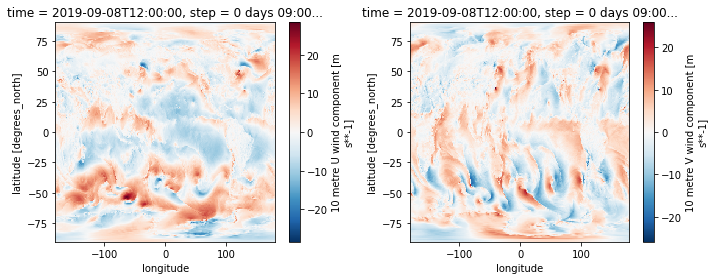

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
ds.u10.plot(ax=axes[0])
ds.v10.plot(ax=axes[1])
plt.tight_layout()
plt.show()

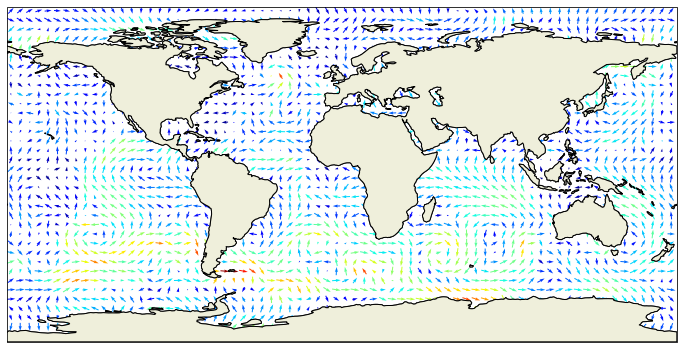

In [6]:
import cartopy
import cartopy.crs as ccrs

fig, ax = plt.subplots(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k')

small_ds = ds.coarsen(latitude=5, boundary="trim").mean().coarsen(longitude=5, boundary="trim").mean()

plt.quiver(small_ds.longitude, small_ds.latitude, small_ds.u_norm, small_ds.v_norm, 
           small_ds.wind_speed, pivot='middle', cmap='jet', alpha=1.0, width=0.0015,
           transform=ccrs.PlateCarree()) 

# Weather at Coordinate

In [ ]:
# TODO